# 1. Cleaning the Replies ('text.x' -- changed to 'text')

# 2. Create Polarity and Subjectivity columns for the englsih exclusive dataframe (eng), to then calculate the sentiment analysis

# 3. Creating Separate Dataframes for: 
- Wins 
- Losses 
- Draws

# 4. Running Preliminary Sentiment on each Dataframe (Wins/Losses/Draws) 
# 5. Create new dataframes for:
- Positive tweets
- Negative tweets
- Neutral tweets

### Installing necessary imports

In [87]:
import spacy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [88]:
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [89]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [90]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 

### Upload the csv file containing the replies

In [4]:
just_reply = pd.read_csv('data_2020.csv')

In [5]:
just_reply.head()

,Unnamed: 0,X.1,X,user_id.x,status_id,created_at.x,screen_name.x,text.x,source.x,display_text_width.x,...,verified.y,profile_banner_url.y,profile_background_url.y,profile_image_url.y,W,L,D,date,W_true,year
0,5118,6141,1,2.468828e+09,1.161790e+18,2019-08-14 23:59:41,muttle9,@ChelseaFC 4-3-3 works extremely well! 🌟🌟🌟🌟,Twitter for Android,32.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
1,5119,6142,2,1.625913e+09,1.161790e+18,2019-08-14 23:59:37,CFCHash,@ChelseaFC 💙💙💙💙💙,Twitter for iPhone,5.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
2,5120,6143,3,7.086827e+17,1.161789e+18,2019-08-14 23:58:43,amirshwki,@ChelseaFC Great game\nKeep up\nLove from IRAQ,Twitter for iPhone,33.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
3,5121,6145,5,8.380335e+17,1.161789e+18,2019-08-14 23:58:23,pbanks5050,"@ChelseaFC All day, Everyday !",Twitter for iPhone,19.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
4,5122,6146,6,1.087478e+18,1.161789e+18,2019-08-14 23:57:21,MyrtilNathanae1,@ChelseaFC I trust in Frank Lampard and it's g...,Twitter for Android,57.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019


In [6]:
len(just_reply)

40610

### Checking how many different languages are in the dataframe

In [7]:
just_reply['lang.x'].value_counts()

en     32322
und     4715
in       859
es       557
pt       428
tl       251
fr       203
sv       132
ht       131
nl       125
ar       125
tr       103
et        82
de        81
it        70
no        49
pl        45
eu        37
cs        36
hi        36
cy        35
ca        35
da        30
ro        23
lv        22
fi        16
lt        11
hu         9
sl         9
is         6
ru         6
vi         6
fa         5
ja         3
zh         2
bn         2
ko         1
uk         1
th         1
Name: lang.x, dtype: int64

In [8]:
len(just_reply['lang.x'].unique())

39

### Create a new dataframe, 'eng', which contains *just* the english text

In [9]:
eng = just_reply.loc[(just_reply['lang.x'] == 'en')]

In [10]:
len(eng)

32322

# 1. Cleaning the replies (text.x changed to text)

In [11]:
# change the 'text.x' column to 'text'
eng.rename(columns={'text.x': 'text'}, inplace=True)

C:\Users\rache\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
eng.head()

,Unnamed: 0,X.1,X,user_id.x,status_id,created_at.x,screen_name.x,text,source.x,display_text_width.x,...,verified.y,profile_banner_url.y,profile_background_url.y,profile_image_url.y,W,L,D,date,W_true,year
0,5118,6141,1,2.468828e+09,1.161790e+18,2019-08-14 23:59:41,muttle9,@ChelseaFC 4-3-3 works extremely well! 🌟🌟🌟🌟,Twitter for Android,32.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
2,5120,6143,3,7.086827e+17,1.161789e+18,2019-08-14 23:58:43,amirshwki,@ChelseaFC Great game\nKeep up\nLove from IRAQ,Twitter for iPhone,33.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
3,5121,6145,5,8.380335e+17,1.161789e+18,2019-08-14 23:58:23,pbanks5050,"@ChelseaFC All day, Everyday !",Twitter for iPhone,19.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
4,5122,6146,6,1.087478e+18,1.161789e+18,2019-08-14 23:57:21,MyrtilNathanae1,@ChelseaFC I trust in Frank Lampard and it's g...,Twitter for Android,57.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
5,5123,6147,7,1.087478e+18,1.161789e+18,2019-08-14 23:56:28,MyrtilNathanae1,@ChelseaFC @nglkante Great night guys just kee...,Twitter for Android,53.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019


## Removing emojis from the eng dataframe

In [13]:
def cleanEmojis(x):
    return str(x).encode('ascii', 'ignore').decode('UTF-8')

In [14]:
eng['text'] = eng['text'].apply(cleanEmojis)

<ipython-input-14-0e6351d2764c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
eng.head()

,Unnamed: 0,X.1,X,user_id.x,status_id,created_at.x,screen_name.x,text,source.x,display_text_width.x,...,verified.y,profile_banner_url.y,profile_background_url.y,profile_image_url.y,W,L,D,date,W_true,year
0,5118,6141,1,2.468828e+09,1.161790e+18,2019-08-14 23:59:41,muttle9,@ChelseaFC 4-3-3 works extremely well!,Twitter for Android,32.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
2,5120,6143,3,7.086827e+17,1.161789e+18,2019-08-14 23:58:43,amirshwki,@ChelseaFC Great game\nKeep up\nLove from IRAQ,Twitter for iPhone,33.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
3,5121,6145,5,8.380335e+17,1.161789e+18,2019-08-14 23:58:23,pbanks5050,"@ChelseaFC All day, Everyday !",Twitter for iPhone,19.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
4,5122,6146,6,1.087478e+18,1.161789e+18,2019-08-14 23:57:21,MyrtilNathanae1,@ChelseaFC I trust in Frank Lampard and it's g...,Twitter for Android,57.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019
5,5123,6147,7,1.087478e+18,1.161789e+18,2019-08-14 23:56:28,MyrtilNathanae1,@ChelseaFC @nglkante Great night guys just kee...,Twitter for Android,53.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019


## Clean the text of replies

In [16]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

In [17]:
# apply the clean the tweets
eng['text'] = eng['text'].apply(cleanTxt)

<ipython-input-17-c179ae41d028>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
eng.tail()

,Unnamed: 0,X.1,X,user_id.x,status_id,created_at.x,screen_name.x,text,source.x,display_text_width.x,...,verified.y,profile_banner_url.y,profile_background_url.y,profile_image_url.y,W,L,D,date,W_true,year
40605,46742,52154,3051,7.743099e+17,1.160634e+18,2019-08-11 19:29:13,queen_Marihana,Forever a BLUE!!,Twitter for iPhone,16.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-11,0,2019
40606,46743,52155,3052,3.240763e+08,1.160634e+18,2019-08-11 19:29:13,AlexGoldberg_,Absolutely. The match fans were way better th...,Twitter for iPhone,71.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-11,0,2019
40607,46744,52156,3053,2.778574e+09,1.160634e+18,2019-08-11 19:29:13,maxisarp1,We go again on Wednesday,Twitter for iPhone,24.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-11,0,2019
40608,46745,52157,3054,9.220688e+17,1.160634e+18,2019-08-11 19:29:12,CFCLew_,Turn up next time,Twitter for iPhone,17.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-11,0,2019
40609,46746,52158,3055,3.252684e+09,1.160634e+18,2019-08-11 19:29:10,H4m3z,Refund them their tickets,Twitter for iPhone,25.0,...,True,https://pbs.twimg.com/profile_banners/22910295...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-11,0,2019


# 2. Create Polarity and Subjectivity columns for the englsih exclusive dataframe (eng), to then calculate the sentiment analysis

In [21]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
eng['Subjectivity'] = eng['text'].apply(getSubjectivity)
eng['Polarity'] = eng['text'].apply(getPolarity)

<ipython-input-21-b403a90b21c1>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-b403a90b21c1>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
eng['Analysis'] = eng['Polarity'].apply(getAnalysis)

<ipython-input-23-afcdbbfbb1a8>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
eng.head()

,Unnamed: 0,X.1,X,user_id.x,status_id,created_at.x,screen_name.x,text,source.x,display_text_width.x,...,profile_image_url.y,W,L,D,date,W_true,year,Subjectivity,Polarity,Analysis
0,5118,6141,1,2.468828e+09,1.161790e+18,2019-08-14 23:59:41,muttle9,4-3-3 works extremely well!,Twitter for Android,32.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,1.000000,-0.15625,Negative
2,5120,6143,3,7.086827e+17,1.161789e+18,2019-08-14 23:58:43,amirshwki,Great game\nKeep up\nLove from IRAQ,Twitter for iPhone,33.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.583333,0.30000,Positive
3,5121,6145,5,8.380335e+17,1.161789e+18,2019-08-14 23:58:23,pbanks5050,"All day, Everyday !",Twitter for iPhone,19.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.600000,-0.25000,Negative
4,5122,6146,6,1.087478e+18,1.161789e+18,2019-08-14 23:57:21,MyrtilNathanae1,I trust in Frank Lampard and it's gonna be a ...,Twitter for Android,57.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.750000,0.80000,Positive
5,5123,6147,7,1.087478e+18,1.161789e+18,2019-08-14 23:56:28,MyrtilNathanae1,Great night guys just keep working and I tru...,Twitter for Android,53.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.750000,0.80000,Positive


# 3. Creating Separate Dataframes for: 
- Wins 
- Losses 
- Draws

## Create dataframe for the wins (replies in which W = 1)

In [25]:
wins = eng.loc[(eng['W'] == 1)]

In [26]:
wins.head()

,Unnamed: 0,X.1,X,user_id.x,status_id,created_at.x,screen_name.x,text,source.x,display_text_width.x,...,profile_image_url.y,W,L,D,date,W_true,year,Subjectivity,Polarity,Analysis
1826,7006,8204,2064,9.577543e+17,1.165413e+18,2019-08-24 23:58:10,moha8563,I really enjoy it,Twitter for iPhone,20.0,...,http://pbs.twimg.com/profile_images/1338595356...,1,0,0,2019-08-24,1,2019,0.50,0.40,Positive
1827,7007,8205,2065,4.902878e+09,1.165412e+18,2019-08-24 23:55:54,NNAMDIS4,"can't you answer, are you dump",Twitter Web App,39.0,...,http://pbs.twimg.com/profile_images/1338595356...,1,0,0,2019-08-24,1,2019,0.00,0.00,Neutral
1832,7012,8210,2070,1.009911e+18,1.165412e+18,2019-08-24 23:53:30,_dillon11,"It went how you wish it went, nonsense club",Twitter for iPhone,43.0,...,http://pbs.twimg.com/profile_images/1338595356...,1,0,0,2019-08-24,1,2019,0.00,0.00,Neutral
1835,7015,8213,2073,3.165832e+08,1.165412e+18,2019-08-24 23:52:40,cleftchineddie,My striker,Twitter for iPhone,10.0,...,http://pbs.twimg.com/profile_images/1338595356...,1,0,0,2019-08-24,1,2019,0.00,0.00,Neutral
1836,7016,8214,2074,2.900990e+08,1.165411e+18,2019-08-24 23:50:38,Phemmites,Exactly why we wish we had played you guys in...,Twitter for iPhone,51.0,...,http://pbs.twimg.com/profile_images/1338595356...,1,0,0,2019-08-24,1,2019,0.25,0.25,Positive


In [27]:
# how many replies are within the wins dataset?
len(wins)

11753

In [28]:
wins.head()

,Unnamed: 0,X.1,X,user_id.x,status_id,created_at.x,screen_name.x,text,source.x,display_text_width.x,...,profile_image_url.y,W,L,D,date,W_true,year,Subjectivity,Polarity,Analysis
1826,7006,8204,2064,9.577543e+17,1.165413e+18,2019-08-24 23:58:10,moha8563,I really enjoy it,Twitter for iPhone,20.0,...,http://pbs.twimg.com/profile_images/1338595356...,1,0,0,2019-08-24,1,2019,0.50,0.40,Positive
1827,7007,8205,2065,4.902878e+09,1.165412e+18,2019-08-24 23:55:54,NNAMDIS4,"can't you answer, are you dump",Twitter Web App,39.0,...,http://pbs.twimg.com/profile_images/1338595356...,1,0,0,2019-08-24,1,2019,0.00,0.00,Neutral
1832,7012,8210,2070,1.009911e+18,1.165412e+18,2019-08-24 23:53:30,_dillon11,"It went how you wish it went, nonsense club",Twitter for iPhone,43.0,...,http://pbs.twimg.com/profile_images/1338595356...,1,0,0,2019-08-24,1,2019,0.00,0.00,Neutral
1835,7015,8213,2073,3.165832e+08,1.165412e+18,2019-08-24 23:52:40,cleftchineddie,My striker,Twitter for iPhone,10.0,...,http://pbs.twimg.com/profile_images/1338595356...,1,0,0,2019-08-24,1,2019,0.00,0.00,Neutral
1836,7016,8214,2074,2.900990e+08,1.165411e+18,2019-08-24 23:50:38,Phemmites,Exactly why we wish we had played you guys in...,Twitter for iPhone,51.0,...,http://pbs.twimg.com/profile_images/1338595356...,1,0,0,2019-08-24,1,2019,0.25,0.25,Positive


## Create dataframe for the losses (replies in which L = 1)

In [29]:
losses = eng.loc[(eng['L'] == 1)]

In [30]:
losses.head()

,Unnamed: 0,X.1,X,user_id.x,status_id,created_at.x,screen_name.x,text,source.x,display_text_width.x,...,profile_image_url.y,W,L,D,date,W_true,year,Subjectivity,Polarity,Analysis
0,5118,6141,1,2.468828e+09,1.161790e+18,2019-08-14 23:59:41,muttle9,4-3-3 works extremely well!,Twitter for Android,32.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,1.000000,-0.15625,Negative
2,5120,6143,3,7.086827e+17,1.161789e+18,2019-08-14 23:58:43,amirshwki,Great game\nKeep up\nLove from IRAQ,Twitter for iPhone,33.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.583333,0.30000,Positive
3,5121,6145,5,8.380335e+17,1.161789e+18,2019-08-14 23:58:23,pbanks5050,"All day, Everyday !",Twitter for iPhone,19.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.600000,-0.25000,Negative
4,5122,6146,6,1.087478e+18,1.161789e+18,2019-08-14 23:57:21,MyrtilNathanae1,I trust in Frank Lampard and it's gonna be a ...,Twitter for Android,57.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.750000,0.80000,Positive
5,5123,6147,7,1.087478e+18,1.161789e+18,2019-08-14 23:56:28,MyrtilNathanae1,Great night guys just keep working and I tru...,Twitter for Android,53.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.750000,0.80000,Positive


In [31]:
len(losses)

10880

## Create dataframe for the draws (replies in which D = 1)

In [32]:
draws = eng.loc[(eng['D'] == 1)]

In [33]:
draws.head()

,Unnamed: 0,X.1,X,user_id.x,status_id,created_at.x,screen_name.x,text,source.x,display_text_width.x,...,profile_image_url.y,W,L,D,date,W_true,year,Subjectivity,Polarity,Analysis
916,6088,7196,1056,1.138201e+18,1.163236e+18,2019-08-18 23:46:06,ArshavinAm,Is time you introduce Michy Batshuayi and sto...,Twitter Web App,129.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,0,1,2019-08-18,0,2019,0.500000,0.5,Positive
917,6089,7197,1057,1.160279e+18,1.163239e+18,2019-08-18 23:58:40,gary85755056,Once a ram,Twitter for iPhone,12.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,0,1,2019-08-18,0,2019,0.000000,0.0,Neutral
920,6092,7201,1061,8.704678e+17,1.163237e+18,2019-08-18 23:51:09,RoeloffsTyler,"I know it was a draw, but it feels like a los...",Twitter for iPhone,75.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,0,1,2019-08-18,0,2019,0.000000,0.0,Neutral
921,6093,7202,1062,1.142340e+18,1.163236e+18,2019-08-18 23:47:06,JSiri16,"Boss Frank,You must give chanceforanother pla...",Twitter for Android,129.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,0,1,2019-08-18,0,2019,0.000000,0.0,Neutral
922,6094,7203,1063,1.018962e+18,1.163235e+18,2019-08-18 23:43:59,gilanguage,"Trust the young talents Frank, like Pep you n...",Twitter for iPhone,129.0,...,http://pbs.twimg.com/profile_images/1338595356...,0,0,1,2019-08-18,0,2019,0.333333,0.2,Positive


In [34]:
len(draws)

9689

# 3. Running Preliminary Sentiment on each Dataframe (Wins/Losses/Draws) 

## Run sentiment for the wins

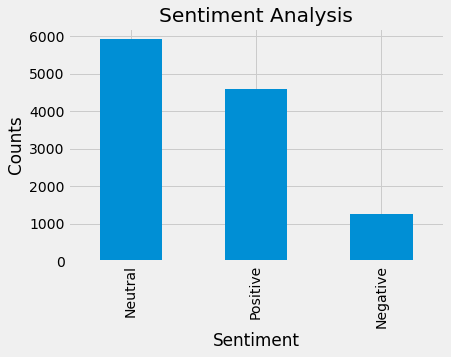

In [35]:
# Plotting and visualizing the counts of sentiment values
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
wins['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [36]:
# Print the percentage of neutral tweets
nutweets = wins[wins.Analysis == 'Neutral']
nutweets = nutweets['text']
nutweets

round( (nutweets.shape[0] / wins.shape[0]) * 100 , 1)

50.3

In [37]:
# Print the percentage of positive tweets
ptweets = wins[wins.Analysis == 'Positive']
ptweets = ptweets['text']
ptweets

round( (ptweets.shape[0] / wins.shape[0]) * 100 , 1)

39.0

In [38]:
# Print the percentage of negative tweets
ntweets = wins[wins.Analysis == 'Negative']
ntweets = ntweets['text']
ntweets

round( (ntweets.shape[0] / wins.shape[0]) * 100, 1)

10.7

## Word Cloud for Wins

In [93]:
# testing global parameters
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [94]:
# Create stopword list:
# Global Parameters
stopwords = set(stopwords.words('english'))
wins_text = " ".join(review for review in wins.text)

In [97]:
import matplotlib.pyplot as plt
import nltk # Natural Language ToolKit
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
stop_words = stopwords.words('english') 
new_stopwords = ["Chelsea"]
stop_words.extend(new_stopwords)
stop_words = set(stop_words)

In [102]:
wins_wordcloud = WordCloud(stopwords=stop_words).generate(wins_text)

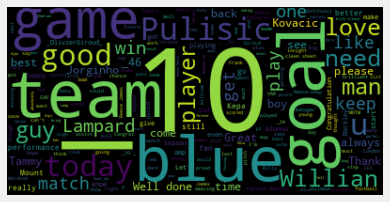

In [103]:
plt.imshow(wins_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wins_wordcloud.png')
plt.show()

## Run sentiment for the losses

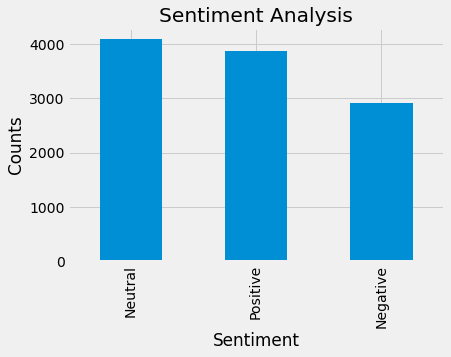

In [43]:
# Plotting and visualizing the counts of sentiment values
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
losses['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [44]:
# Print the percentage of neutral tweets
nutweets = losses[losses.Analysis == 'Neutral']
nutweets = nutweets['text']
nutweets
8
round( (nutweets.shape[0] / losses.shape[0]) * 100 , 1)

37.6

In [45]:
# Print the percentage of positive tweets
ptweets = losses[losses.Analysis == 'Positive']
ptweets = ptweets['text']
ptweets

round( (ptweets.shape[0] / losses.shape[0]) * 100 , 1)

35.6

In [46]:
# Print the percentage of negative tweets
ntweets = losses[losses.Analysis == 'Negative']
ntweets = ntweets['text']
ntweets

round( (ntweets.shape[0] / losses.shape[0]) * 100, 1)

26.8

### Losses Word Cloud

In [104]:
# Create stopword list:
# Global Parameters
stop_words = set(stopwords.words('english'))
losses_text = " ".join(review for review in losses.text)

In [105]:
stop_words = stopwords.words('english') 
new_stopwords = ["Chelsea"]
stop_words.extend(new_stopwords)
stop_words = set(stop_words)

In [106]:
losses_wordcloud = WordCloud(stopwords=stop_words).generate(losses_text)

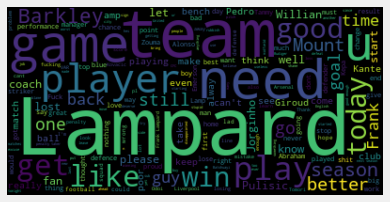

In [107]:
plt.imshow(losses_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('losses_wordcloud.png')
plt.show()

## Run sentiment on the draws

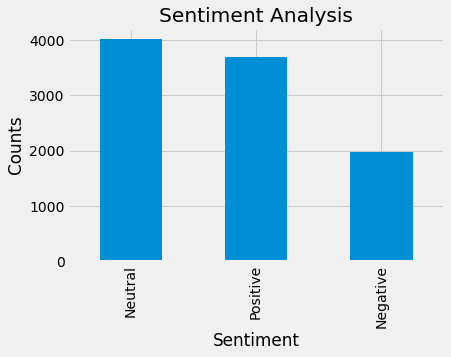

In [50]:
# Plotting and visualizing the counts of sentiment values
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
draws['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [51]:
# Print the percentage of neutral tweets
nutweets = draws[draws.Analysis == 'Neutral']
nutweets = nutweets['text']
nutweets

round( (nutweets.shape[0] / draws.shape[0]) * 100 , 1)

41.5

In [52]:
# Print the percentage of positive tweets
ptweets = draws[draws.Analysis == 'Positive']
ptweets = ptweets['text']
ptweets

round( (ptweets.shape[0] / draws.shape[0]) * 100 , 1)

38.1

In [53]:
# Print the percentage of negative tweets
ntweets = draws[draws.Analysis == 'Negative']
ntweets = ntweets['text']
ntweets

round( (ntweets.shape[0] / draws.shape[0]) * 100, 1)

20.4

### Draws Word Cloud

In [54]:
# Create stopword list:
# Global Parameters
stop_words = set(stopwords.words('english'))
draws_text = " ".join(review for review in draws.text)

In [108]:
stop_words = stopwords.words('english') 
new_stopwords = ["Chelsea"]
stop_words.extend(new_stopwords)
stop_words = set(stop_words)

In [109]:
draws_wordcloud = WordCloud(stopwords=stop_words).generate(draws_text)

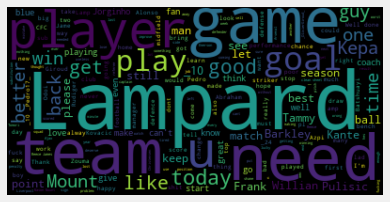

In [110]:
plt.imshow(draws_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('draws_wordcloud.png')
plt.show()

# 5. Create new dataframes for:
- Positive tweets
- Negative tweets
- Neutral tweets

## Positive tweets (where eng['Analysis'] == 'Positive')

In [61]:
positive = eng.loc[(eng['Analysis'] == 'Positive')]

In [63]:
len(positive)

12144

## Negative tweets (where eng['Analysis'] == 'Negative')

In [64]:
negative = eng.loc[(eng['Analysis'] == 'Negative')]

In [65]:
len(negative)

6150

## Neutral tweets (where eng['Analysis'] == 'Neutral')

In [66]:
neutral = eng.loc[(eng['Analysis'] == 'Neutral')]

In [67]:
len(neutral)

14028

### Export several dataframes into CSV files:

In [57]:
# export eng dataframe as CSV
eng.to_csv('english_replies.csv')

In [58]:
# export wins dataframe as CSV
wins.to_csv('wins.csv')

In [59]:
# export losses dataframe as CSV
losses.to_csv('losses.csv')

In [60]:
# export draws dataframe as CSV
draws.to_csv('draws.csv')

In [68]:
# export positive, negative, and neutral dataframes to CSV
positive.to_csv('positive.csv')
negative.to_csv('negative.csv')
neutral.to_csv('neutral.csv')